In [2]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
## target_competencia = pd.read_csv('target_competencia.csv')
## RECIÉN VA A SER UTILIZADO EN EL TP2. (COLUMNAS obj_Sc Y obj_St SON 0)

In [61]:
################################################################
## EVENTS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
events= pd.read_csv('../../data/events.csv')
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (EVENTS)
events['wifi'] = events['wifi'].fillna(False).astype(bool)
events['connection_type'] = events['connection_type'].astype('category')
events['trans_id'] = events['trans_id'].astype('category')
events['date'] = pd.to_datetime(events['date'], infer_datetime_format=True)
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
events['mes'] = events['date'].dt.month
events['dia'] = events['date'].dt.day
events['hora'] = events['date'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
events['nombre_dia'] = events['date'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
events.loc[events.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
events.loc[events.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
events.loc[events.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
events.loc[events.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
events.loc[events.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
events.loc[events.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
events.loc[events.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DdiasemanaE LOS MESES.
events['nombre_mes'] = ''
events.loc[events.mes == 1, 'nombre_mes'] = 'ENERO'
events.loc[events.mes == 2, 'nombre_mes'] = 'FEBRERO'
events.loc[events.mes == 3, 'nombre_mes'] = 'MARZO'
events.loc[events.mes == 4, 'nombre_mes'] = 'ABRIL'
events.loc[events.mes == 5, 'nombre_mes'] = 'MAYO'
events.loc[events.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
events['hora_madrugada'] = 0
events.loc[((events.hora > -1) & (events.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
events['hora_maniana'] = 0
events.loc[((events.hora > 6) & (events.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
events['hora_almuerzo'] = 0
events.loc[((events.hora > 11) & (events.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
events['hora_tarde'] = 0
events.loc[((events.hora > 13) & (events.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
events['hora_noche'] = 0
events.loc[((events.hora > 18) & (events.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
events['nombre_dia'] = events['nombre_dia'].astype('category')
events['nombre_mes'] = events['nombre_mes'].astype('category')
################################################################
################################################################

In [55]:
################################################################
## CLICKS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
clicks = pd.read_csv('../../data/clicks.csv')
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (CLICKS)
clicks['created'] = pd.to_datetime(clicks['created'], infer_datetime_format=True)
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
clicks['mes'] = clicks['created'].dt.month
clicks['dia'] = clicks['created'].dt.day
clicks['hora'] = clicks['created'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
clicks['nombre_dia'] = clicks['created'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
clicks.loc[clicks.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
clicks.loc[clicks.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
clicks.loc[clicks.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
clicks.loc[clicks.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
clicks.loc[clicks.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
clicks.loc[clicks.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
clicks.loc[clicks.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DE LOS MESES.
clicks['nombre_mes'] = ''
clicks.loc[clicks.mes == 1, 'nombre_mes'] = 'ENERO'
clicks.loc[clicks.mes == 2, 'nombre_mes'] = 'FEBRERO'
clicks.loc[clicks.mes == 3, 'nombre_mes'] = 'MARZO'
clicks.loc[clicks.mes == 4, 'nombre_mes'] = 'ABRIL'
clicks.loc[clicks.mes == 5, 'nombre_mes'] = 'MAYO'
clicks.loc[clicks.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
clicks['hora_madrugada'] = 0
clicks.loc[((clicks.hora > -1) & (clicks.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
clicks['hora_maniana'] = 0
clicks.loc[((clicks.hora > 6) & (clicks.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
clicks['hora_almuerzo'] = 0
clicks.loc[((clicks.hora > 11) & (clicks.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
clicks['hora_tarde'] = 0
clicks.loc[((clicks.hora > 13) & (clicks.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
clicks['hora_noche'] = 0
clicks.loc[((clicks.hora > 18) & (clicks.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
clicks['nombre_dia'] = clicks['nombre_dia'].astype('category')
clicks['nombre_mes'] = clicks['nombre_mes'].astype('category')
################################################################
################################################################

In [60]:
################################################################
## INSTALLS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
installs = pd.read_csv('../../data/installs.csv')
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (INSTALLS)
installs['kind'] = installs['kind'].astype('category')
installs['user_agent'] = installs['user_agent'].astype('category')
installs['session_user_agent'] = installs['session_user_agent'].astype('category')
installs['created'] = pd.to_datetime(installs['created'], infer_datetime_format=True)
installs['trans_id'] = installs['trans_id'].astype('category')
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
installs['mes'] = installs['created'].dt.month
installs['dia'] = installs['created'].dt.day
installs['hora'] = installs['created'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
installs['nombre_dia'] = installs['created'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
installs.loc[installs.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
installs.loc[installs.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
installs.loc[installs.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
installs.loc[installs.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
installs.loc[installs.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
installs.loc[installs.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
installs.loc[installs.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DE LOS MESES.
installs['nombre_mes'] = ''
installs.loc[installs.mes == 1, 'nombre_mes'] = 'ENERO'
installs.loc[installs.mes == 2, 'nombre_mes'] = 'FEBRERO'
installs.loc[installs.mes == 3, 'nombre_mes'] = 'MARZO'
installs.loc[installs.mes == 4, 'nombre_mes'] = 'ABRIL'
installs.loc[installs.mes == 5, 'nombre_mes'] = 'MAYO'
installs.loc[installs.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
installs['hora_madrugada'] = 0
installs.loc[((installs.hora > -1) & (installs.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
installs['hora_maniana'] = 0
installs.loc[((installs.hora > 6) & (installs.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
installs['hora_almuerzo'] = 0
installs.loc[((installs.hora > 11) & (installs.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
installs['hora_tarde'] = 0
installs.loc[((installs.hora > 13) & (installs.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
installs['hora_noche'] = 0
installs.loc[((installs.hora > 18) & (installs.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
installs['nombre_dia'] = installs['nombre_dia'].astype('category')
installs['nombre_mes'] = installs['nombre_mes'].astype('category')
################################################################
################################################################

In [49]:
installs_hora_madrugada = installs[installs['hora_madrugada'] == 1]
installs_hora_maniana = installs[installs['hora_maniana'] == 1]
installs_hora_almuerzo = installs[installs['hora_almuerzo'] == 1]
installs_hora_tarde = installs[installs['hora_tarde'] == 1]
installs_hora_noche = installs[installs['hora_noche'] == 1]

In [3]:
################################################################
## AUCTIONS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
auctions = pd.read_csv('../../data/auctions.csv',nrows=5000000)
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (AUCTIONS)
auctions['date'] = pd.to_datetime(auctions['date'], infer_datetime_format=True)
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
auctions['mes'] = auctions['date'].dt.month
auctions['dia'] = auctions['date'].dt.day
auctions['hora'] = auctions['date'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
auctions['nombre_dia'] = auctions['date'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
auctions.loc[auctions.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
auctions.loc[auctions.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
auctions.loc[auctions.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
auctions.loc[auctions.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
auctions.loc[auctions.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
auctions.loc[auctions.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
auctions.loc[auctions.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DE LOS MESES.
auctions['nombre_mes'] = ''
auctions.loc[auctions.mes == 1, 'nombre_mes'] = 'ENERO'
auctions.loc[auctions.mes == 2, 'nombre_mes'] = 'FEBRERO'
auctions.loc[auctions.mes == 3, 'nombre_mes'] = 'MARZO'
auctions.loc[auctions.mes == 4, 'nombre_mes'] = 'ABRIL'
auctions.loc[auctions.mes == 5, 'nombre_mes'] = 'MAYO'
auctions.loc[auctions.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
auctions['hora_madrugada'] = 0
auctions.loc[((auctions.hora > -1) & (auctions.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
auctions['hora_maniana'] = 0
auctions.loc[((auctions.hora > 6) & (auctions.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
auctions['hora_almuerzo'] = 0
auctions.loc[((auctions.hora > 11) & (auctions.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
auctions['hora_tarde'] = 0
auctions.loc[((auctions.hora > 13) & (auctions.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
auctions['hora_noche'] = 0
auctions.loc[((auctions.hora > 18) & (auctions.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
auctions['nombre_dia'] = auctions['nombre_dia'].astype('category')
auctions['nombre_mes'] = auctions['nombre_mes'].astype('category')
################################################################
################################################################

Text(0, 0.5, 'Cantidad de subastas')

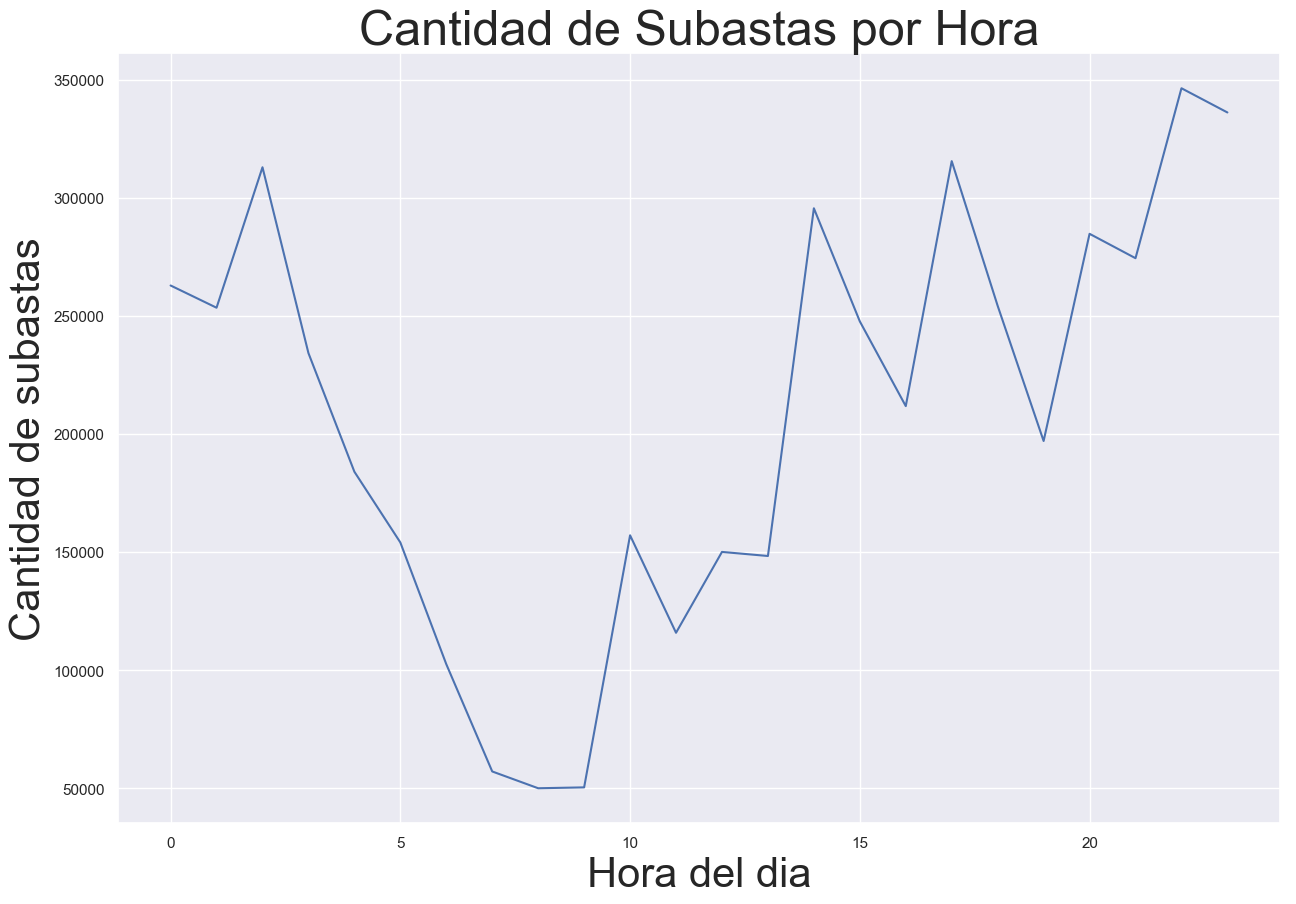

In [5]:
sns.set(style="darkgrid")

subastas_por_hora = pd.DataFrame()
subastas_por_hora['hora'] = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
subastas_por_hora['cantidades_por_hora'] = auctions.groupby('hora').size()

g = sns.lineplot(x=subastas_por_hora['hora'], y=subastas_por_hora['cantidades_por_hora'])
g.set_title("Cantidad de Subastas por Hora", fontsize=35)
g.set_xlabel("Hora del dia", fontsize=30)
g.set_ylabel("Cantidad de subastas", fontsize=30)